#PDA 2 Assignment #1 - Yazeed Yabroudi - Section 1

#PART A: DATA ENGINEERING (3 points)

#Question 1 - Load the train_series.csv file and pivot the time-dependent columns (PAY, BILL_AMT, and PAY_AMT) to build one column of these per month. (Ex. PAY_JUNE, PAY_MAY, ..., BILL_AMT_JUNE, ...)


In [30]:
import pandas as pd
df = pd.read_csv("train_series.csv")
df_pivot = df.pivot(index = "ID", columns = "MONTH", values = ["PAY","BILL_AMT","PAY_AMT"])
df_pivot.columns = ['_'.join(col) for  col in df_pivot.columns.values]
df_pivot.reset_index(inplace = True)
df_pivot.head()

,ID,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,0,0.0,-1.0,0.0,-1.0,0.0,0.0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
2,3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,23570.0,0.0,735.0,0.0,0.0,0.0,742.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,331.0,356.0,330.0,1140.0,341.0,1150.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,44412.0,35704.0,36524.0,50840.0,45402.0,49592.0,1837.0,1254.0,1387.0,2100.0,1139.0,1847.0


#Question 2 - Load train_customers.csv and include the pivoted table of time series data. The resulting table must be a table with one row per customer (ID)

In [31]:
df_customers = pd.read_csv("train_customers.csv")
merged_df = pd.merge(df_customers, df_pivot, on = "ID", how="left")
merged_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,15936,140000.0,2,1,1,39,-1.0,-1.0,0.0,1.0,...,20506.0,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0
1,15248,90000.0,2,2,1,49,-2.0,-1.0,-1.0,1.0,...,6990.0,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0
2,27163,150000.0,2,1,1,37,-1.0,0.0,-1.0,-1.0,...,1914.0,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0
3,13955,160000.0,1,3,1,38,0.0,0.0,0.0,0.0,...,7083.0,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0
4,23604,360000.0,1,2,1,28,2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0


#Question 3 - Include information from the target (train_target.csv) on the table

In [32]:
df_target = pd.read_csv("train_target.csv")
final_df = pd.merge(merged_df, df_target, on = "ID", how="left")
final_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,-1.0,-1.0,0.0,1.0,...,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,-2.0,-1.0,-1.0,1.0,...,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,-1.0,0.0,-1.0,-1.0,...,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,0.0,0.0,0.0,0.0,...,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2.0,-2.0,-2.0,-2.0,...,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0,0


#PART B: EXPLORATORY DATA ANALYSIS (2 points)


#Question 4 - Represent the distribution of the target in a chart


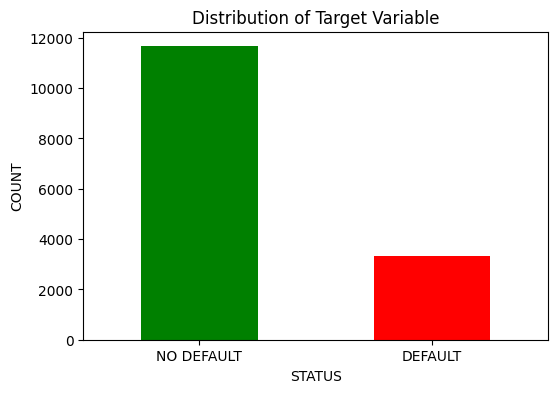

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
final_df["DEFAULT_JULY"].value_counts().plot(kind="bar", color=["green", "red"])
plt.title("Distribution of Target Variable")
plt.xlabel("STATUS")
plt.ylabel("COUNT")
plt.xticks(ticks=[0, 1], labels=["NO DEFAULT", "DEFAULT"], rotation = 0)
plt.show()

#Explaining above chart

The purpose of the chart is to visually represent the distribution of a target variable, specifically the default status (such as credit card default) for the month of July, within a dataset. By plotting the counts of "DEFAULT" versus "NO DEFAULT" statuses as a bar chart, it allows for a clear, immediate understanding of how many cases in the dataset are defaults compared to non-defaults. This visualization aids in quickly assessing the risk level or financial stability of the subjects (e.g., customers, loans) within the dataset, making it particularly useful for financial analysis, risk management, and decision-making processes.

#Question 5 - Plot the univariate distribution of all features. Comment the results.

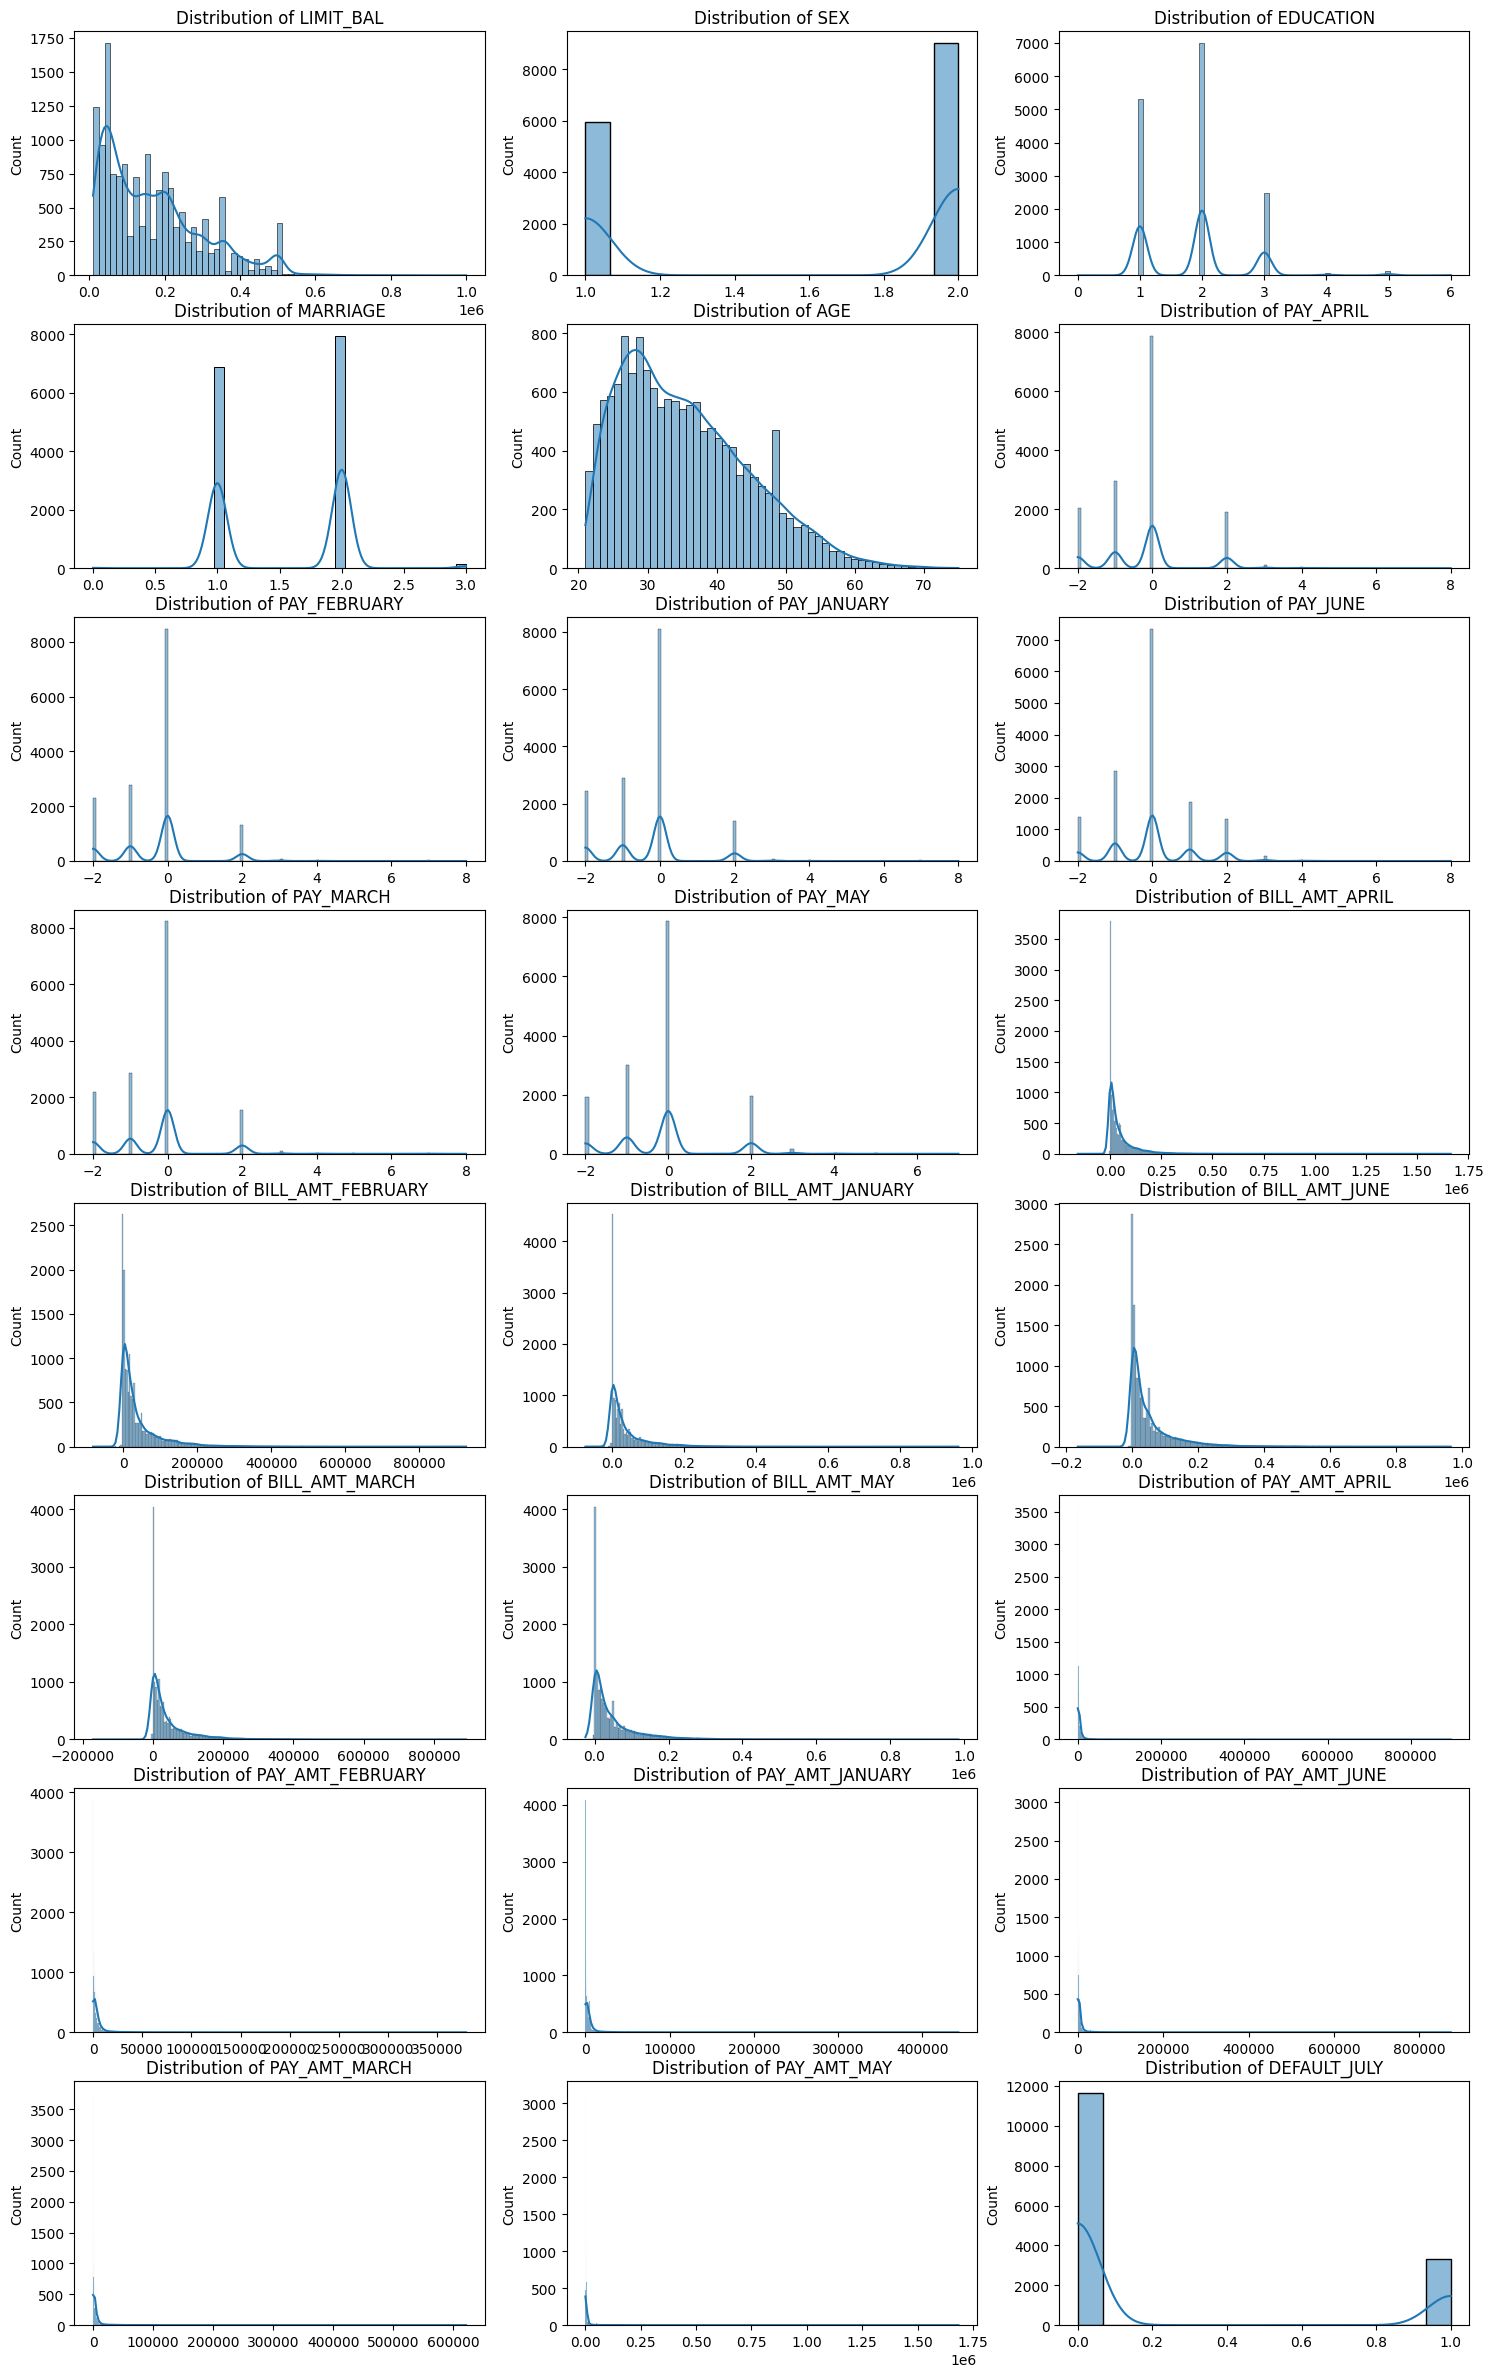

In [34]:
import seaborn as sns
import math
num_f = len(final_df.columns) - 1
num_r = math.ceil(num_f/2)
num_c = 3
plt.figure(figsize=(18, 45))
for i, column in enumerate(final_df.columns[1:]):
    plt.subplot(num_r, num_c, i + 1)
    sns.histplot(final_df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel("")

plt.show()

#Explaining above chart - The histograms serve as a gateway to grasp the distribution patterns of various variables within our dataset, marking a pivotal phase in our exploratory data analysis journey. This visual exploration is not just illuminative but foundational, setting the stage for subsequent in-depth statistical examination and the crafting of innovative features aimed at enhancing the predictive model's prowess. Among these variables, the payment history markers (PAY_*), the credit limit balance (LIMIT_BAL), and the bill statement amounts (BILL_AMT_*) emerge as critical pillars, given their direct linkage to credit behavior. This exploration, while shedding light on the general trends and outliers, especially accentuates the significance of understanding how these key variables play a role in foreseeing credit card defaults, thereby underscoring their paramount importance in our predictive modeling endeavor.

#Question 6 - Plot a 3D chart using Plotly. Including 3 or more variables of your dataset. One of those variables should be the target.

In [35]:
import plotly.express as px
fig = px.scatter_3d(final_df, x = "LIMIT_BAL", y = "AGE", z = "BILL_AMT_JUNE", color = "DEFAULT_JULY", symbol = "SEX", opacity = 0.7, size_max = 10,
                    labels = {"LIMIT_BAL":"Credit Limit", "AGE":"Age", "BILL_AMT_JUNE":"Bill Amount(JUNE)", "DEFAULT_JULY":"Default Status", "SEX":"Gender"})
fig.update_layout(title="3d Scatter Plot of Credit Limit, Age, and Bill Amount (JUNE)", scene = dict(xaxis_title ="Credit Limit", yaxis_title = "Age", zaxis_title = "Bill Amount (JUNE)"))
fig.show()

#Explain above chart - In summary, the 3D scatter plot serves as a powerful tool for visualizing and analyzing the interplay between credit limit, age, bill amount, and their relationship with default status and gender, offering valuable insights into customer behavior and financial risk management.







#PART C: DATA ANALYTICS (5 points)

#Question 7 - Build a machine learning model to estimate the probability of default.

In [36]:
# Load datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
submission_features = pd.read_csv('submission_features.csv')

In [37]:
X_train = train_data.drop(columns = ['ID','DEFAULT_JULY'])
y_train = train_data['DEFAULT_JULY']
X_test = test_data.drop(columns=['ID', 'DEFAULT_JULY'])
y_test = test_data['DEFAULT_JULY']

In [38]:
len(test_data)

8000

In [39]:
len(train_data)

15000

In [40]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib

In [41]:
from sklearn.model_selection import GridSearchCV
def gridcv(param_grid,model,X_train,y_train):
    # Instantiate the GridSearchCV object: model_cv
    model_cv1 = GridSearchCV(model,param_grid,refit=True, cv=10, scoring = 'accuracy')
    # Fit it to the data
    model_cv1.fit(X_train,y_train)
    #Print the tuned parameters and score
    print("Tuned Parameters: {}".format(model_cv1.best_params_))
    print("Best score is {}".format(model_cv1.best_score_))
    print("Best estimator is {}".format(model_cv1.best_estimator_))

In [42]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

# Model selection and training
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())  # Change model here
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    # Add more hyperparameters as needed
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy}, ROC AUC: {roc_auc}')

Accuracy: 0.82725, ROC AUC: 0.6623765825774754


In [45]:
# Generate predictions
submission_proba = best_model.predict_proba(submission_features.drop(columns=['ID']))[:, 1]
submission_df = pd.DataFrame({'ID': submission_features['ID'], 'DEFAULT_JULY': submission_proba})

# Replace 'probability' column with 'DEFAULT_JULY'
submission_df_corrected = submission_df.rename(columns={'probability': 'DEFAULT_JULY'})

# Save the corrected DataFrame to a new CSV file
corrected_file_path = 'Yabroud_Yazeed_Assignment1.csv'
submission_df_corrected.to_csv(corrected_file_path, index=False)

corrected_file_path

'Yabroud_Yazeed_Assignment1.csv'

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train and y_train are your training data and labels respectively

# Setup the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, max_depth=None))  # Example parameters
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')

# Print the ROC AUC scores for each fold and the mean score
print(f'ROC AUC Scores for Each Fold: {cv_scores}')
print(f'Mean ROC AUC Score: {np.mean(cv_scores)}')

ROC AUC Scores for Each Fold: [0.77053569 0.76095087 0.74295342 0.75397329 0.77332233]
Mean ROC AUC Score: 0.7603471185801101


#Question #8 - What's the best threshold you should consider to maximize the profit?

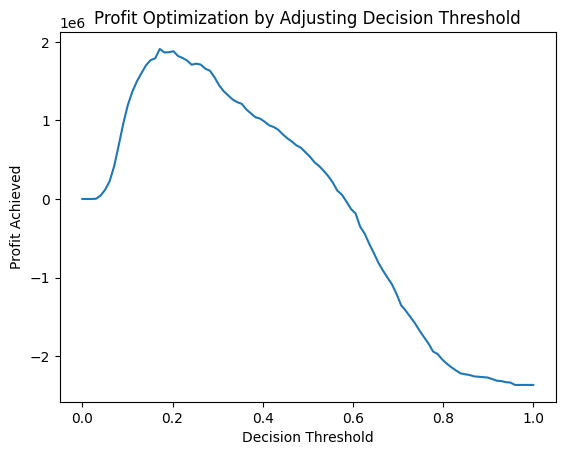

Optimal Decision Threshold: 0.17171717171717174
Highest Profit Achieved: 1911000


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_model, X_test, and y_test are already defined

decision_thresholds = np.linspace(0, 1, 100)
profit_list = []
for threshold in decision_thresholds:
    # Predicting with the given threshold
    y_pred = (best_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    # Calculating profit: 1000 for true negatives, -5000 for false negatives
    current_profit = 1000 * ((y_pred == 0) & (y_test == 0)).sum() - 5000 * ((y_pred == 0) & (y_test == 1)).sum()
    profit_list.append(current_profit)

# Plotting the profit vs. threshold graph
plt.plot(decision_thresholds, profit_list)
plt.xlabel('Decision Threshold')
plt.ylabel('Profit Achieved')
plt.title('Profit Optimization by Adjusting Decision Threshold')
plt.show()

# Calculating the maximum profit and the corresponding best threshold
highest_profit = max(profit_list)
optimal_threshold = decision_thresholds[profit_list.index(highest_profit)]

print('Optimal Decision Threshold:', optimal_threshold)
print('Highest Profit Achieved:', highest_profit)
